In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as fit
from scipy.signal import periodogram, welch
sys.path.append("../")
import analysis
def sin_wave(t, Ampl, phase, freq):
    return np.abs(Ampl) * np.sin(freq * 2 * np.pi * t - phase)
Pins = [10, 25, 36, 48, 57, 65]

In [2]:
laser = analysis.System("sagnac", ["../../data/20241029/Pin_10_32/iter_" + str(i) + ".tdms" for i in range(0, 20)] + ["../../data/20241029/Pin_25_03/iter_" + str(i) + ".tdms" for i in range(24, 47)] + ["../../data/20241029/Pin_36_19/iter_" + str(i) + ".tdms" for i in range(21, 47)] + ["../../data/20241029/Pin_48_75/iter_" + str(i) + ".tdms" for i in range(29, 56)] + ["../../data/20241029/Pin_57_27/iter_" + str(i) + ".tdms" for i in range(186, 212)] + ["../../data/20241029/Pin_65_46/iter_" + str(i) + ".tdms" for i in range(331, 359)], set_data = True, channel = "X")
mic = analysis.System("mic", ["../../data/20241029/Pin_10_32/iter_" + str(i) + ".tdms" for i in range(0, 20)] + ["../../data/20241029/Pin_25_03/iter_" + str(i) + ".tdms" for i in range(24, 47)] + ["../../data/20241029/Pin_36_19/iter_" + str(i) + ".tdms" for i in range(21, 47)] + ["../../data/20241029/Pin_48_75/iter_" + str(i) + ".tdms" for i in range(29, 56)] + ["../../data/20241029/Pin_57_27/iter_" + str(i) + ".tdms" for i in range(186, 212)] + ["../../data/20241029/Pin_65_46/iter_" + str(i) + ".tdms" for i in range(331, 359)], set_data = True, channel = "Y")

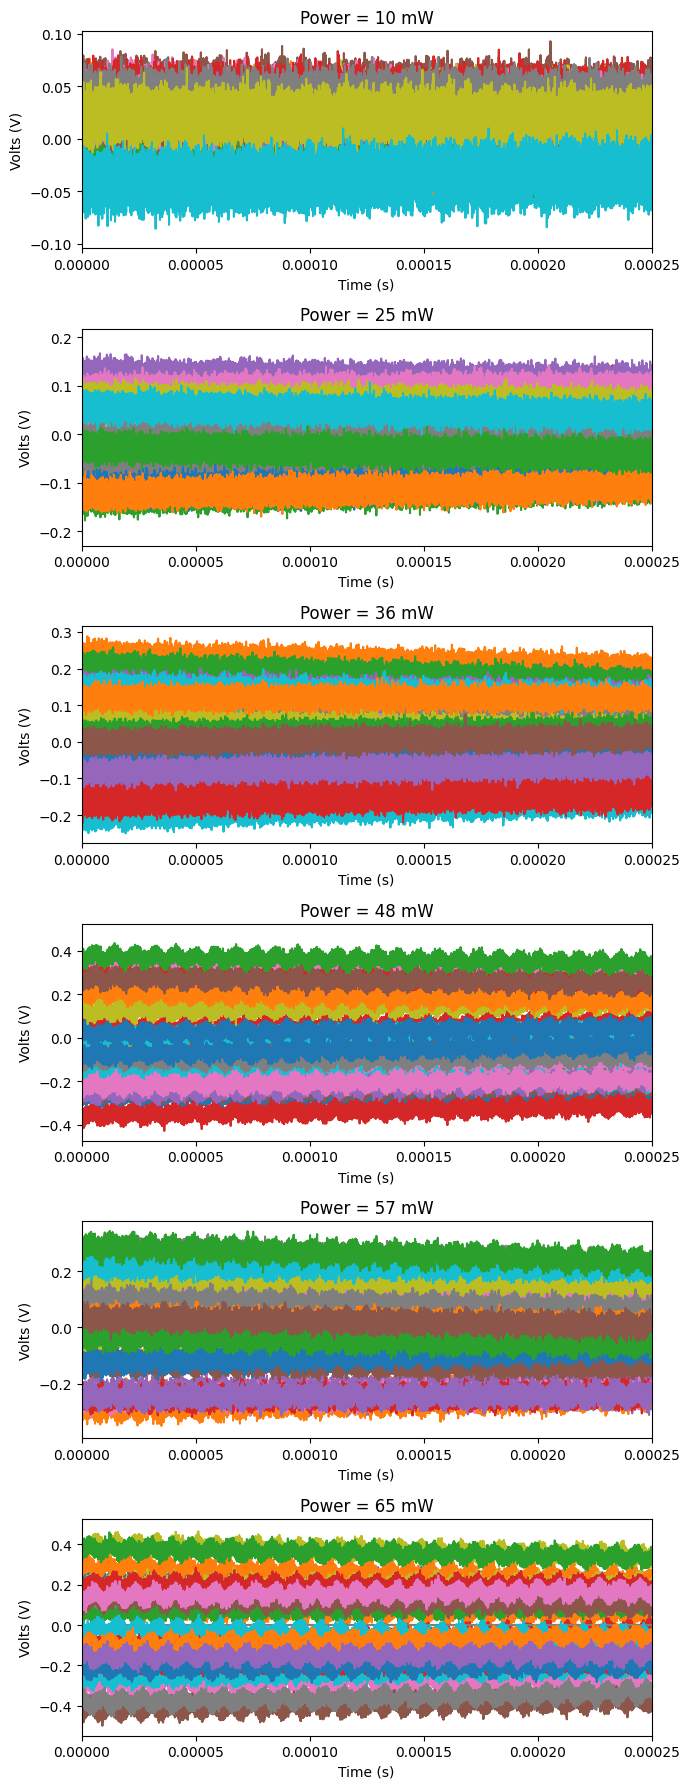

In [18]:
fig, ax = plt.subplots(6, 1, figsize = (7, 18))
for i in range(len(laser.get_data())):
    laser.set_data(ind = i)
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    if int(laser.get_df()[i][24:26]) == Pins[0]:
        ax[0].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
    elif int(laser.get_df()[i][24:26]) == Pins[1]:
        ax[1].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
    elif int(laser.get_df()[i][24:26]) == Pins[2]:
        ax[2].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
    elif int(laser.get_df()[i][24:26]) == Pins[3]:
        ax[3].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
    elif int(laser.get_df()[i][24:26]) == Pins[4]:
        ax[4].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
    elif int(laser.get_df()[i][24:26]) == Pins[5]:
        ax[5].plot(laser.get_data()[i].collection[0].t, laser.get_data()[i].collection[0].x)
for i, a in enumerate(ax):
    a.set_xlim(0, 2.5e-4)
    a.set_xlabel("Time (s)")
    a.set_ylabel("Volts (V)")
    a.set_title("Power = " + str(Pins[i]) + " mW")
plt.tight_layout()
plt.show()

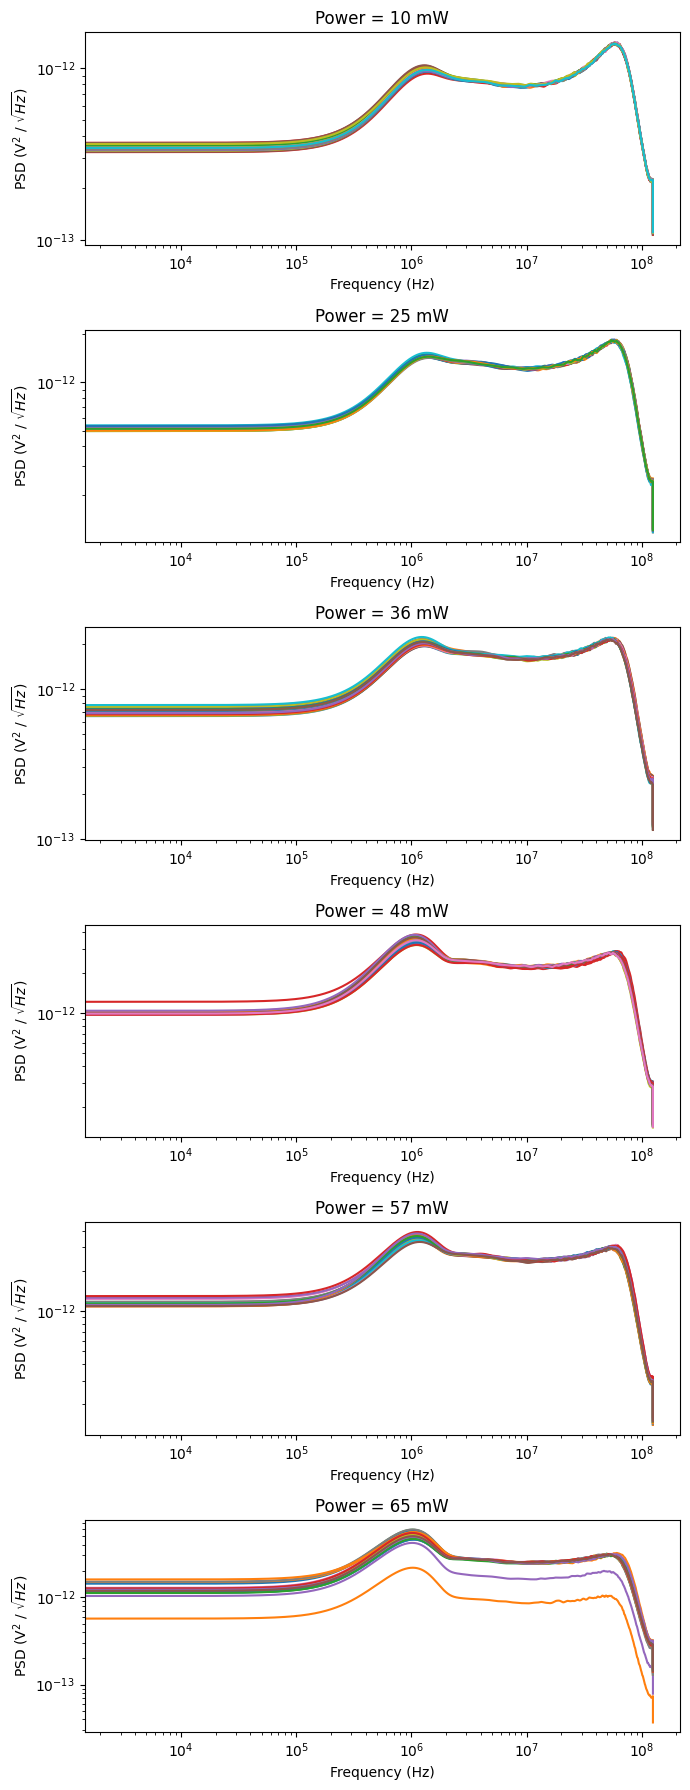

In [3]:
freqs = []
psds = []
for i in range(len(laser.get_data())):
    laser.set_data(ind = i)
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    f, x = welch(laser.get_data()[i].collection[0].x, laser.get_data()[i].r, nfft = 100000)
    freqs.append(np.array(f))
    psds.append(np.array(x))

In [ ]:
fig, ax = plt.subplots(6, 1, figsize = (7, 18))
for i in range(len(laser.get_data())):
    if int(laser.get_df()[i][24:26]) == Pins[0]:
        ax[0].plot(freqs[i], psds[i])
    elif int(laser.get_df()[i][24:26]) == Pins[1]:
        ax[1].plot(freqs[i], psds[i])
    elif int(laser.get_df()[i][24:26]) == Pins[2]:
        ax[2].plot(freqs[i], psds[i])
    elif int(laser.get_df()[i][24:26]) == Pins[3]:
        ax[3].plot(freqs[i], psds[i])
    elif int(laser.get_df()[i][24:26]) == Pins[4]:
        ax[4].plot(freqs[i], psds[i])
    elif int(laser.get_df()[i][24:26]) == Pins[5]:
        if np.mean(psds[i]) > 1e-35:
            ax[5].plot(freqs[i], psds[i])
for i, a in enumerate(ax):
    a.set_xlabel("Frequency (Hz)")
    a.set_ylabel(r"PSD (V$^2$ / $\sqrt{Hz}$)")
    a.set_title("Power = " + str(Pins[i]) + " mW")
    a.set_xscale("log")
    a.set_yscale("log")
plt.tight_layout()
plt.show()

In [6]:
freqs = []
psds = []
for i in range(len(laser.get_data())):
    laser.set_data(ind = i)
    laser.get_data()[i].apply("detrend", mode = "linear", inplace = True)
    laser.get_data()[i].apply("lowpass", cutoff = 1e6, inplace = True)
    laser.get_data()[i].apply("bin_average", Npts = int(laser.get_data()[i].r / (2 * 1e6)), inplace = True)
    f, x = periodogram(laser.get_data()[i].collection[0].x, laser.get_data()[i].r, nfft = 2**21)
    freqs.append(np.array(f))
    psds.append(np.array(x))

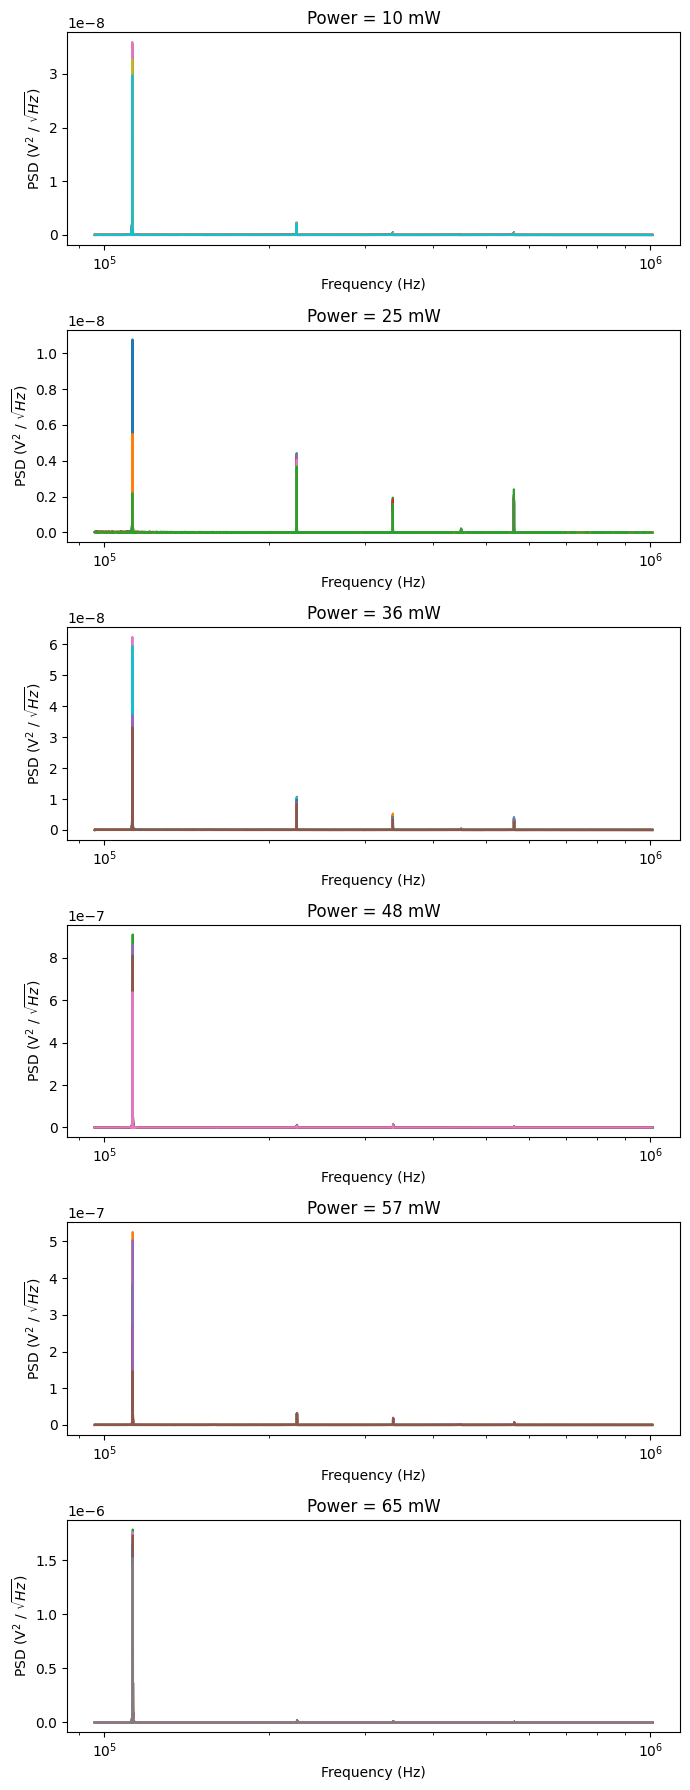

In [7]:
fig, ax = plt.subplots(6, 1, figsize = (7, 18))
start = 100000
for i in range(len(laser.get_data())):
    if int(laser.get_df()[i][24:26]) == Pins[0]:
        ax[0].plot(freqs[i][start:], psds[i][start:])
    elif int(laser.get_df()[i][24:26]) == Pins[1]:
        ax[1].plot(freqs[i][start:], psds[i][start:])
    elif int(laser.get_df()[i][24:26]) == Pins[2]:
        ax[2].plot(freqs[i][start:], psds[i][start:])
    elif int(laser.get_df()[i][24:26]) == Pins[3]:
        ax[3].plot(freqs[i][start:], psds[i][start:])
    elif int(laser.get_df()[i][24:26]) == Pins[4]:
        ax[4].plot(freqs[i][start:], psds[i][start:])
    elif int(laser.get_df()[i][24:26]) == Pins[5]:
        if np.mean(psds[i]) > 1e-35:
            ax[5].plot(freqs[i][start:], psds[i][start:])
for i, a in enumerate(ax):
    a.set_xlabel("Frequency (Hz)")
    a.set_ylabel(r"PSD (V$^2$ / $\sqrt{Hz}$)")
    a.set_title("Power = " + str(Pins[i]) + " mW")
    # a.set_xlim(1e5, 1e6)
    a.set_xscale("log")
    # a.set_yscale("log")
plt.tight_layout()
plt.show()

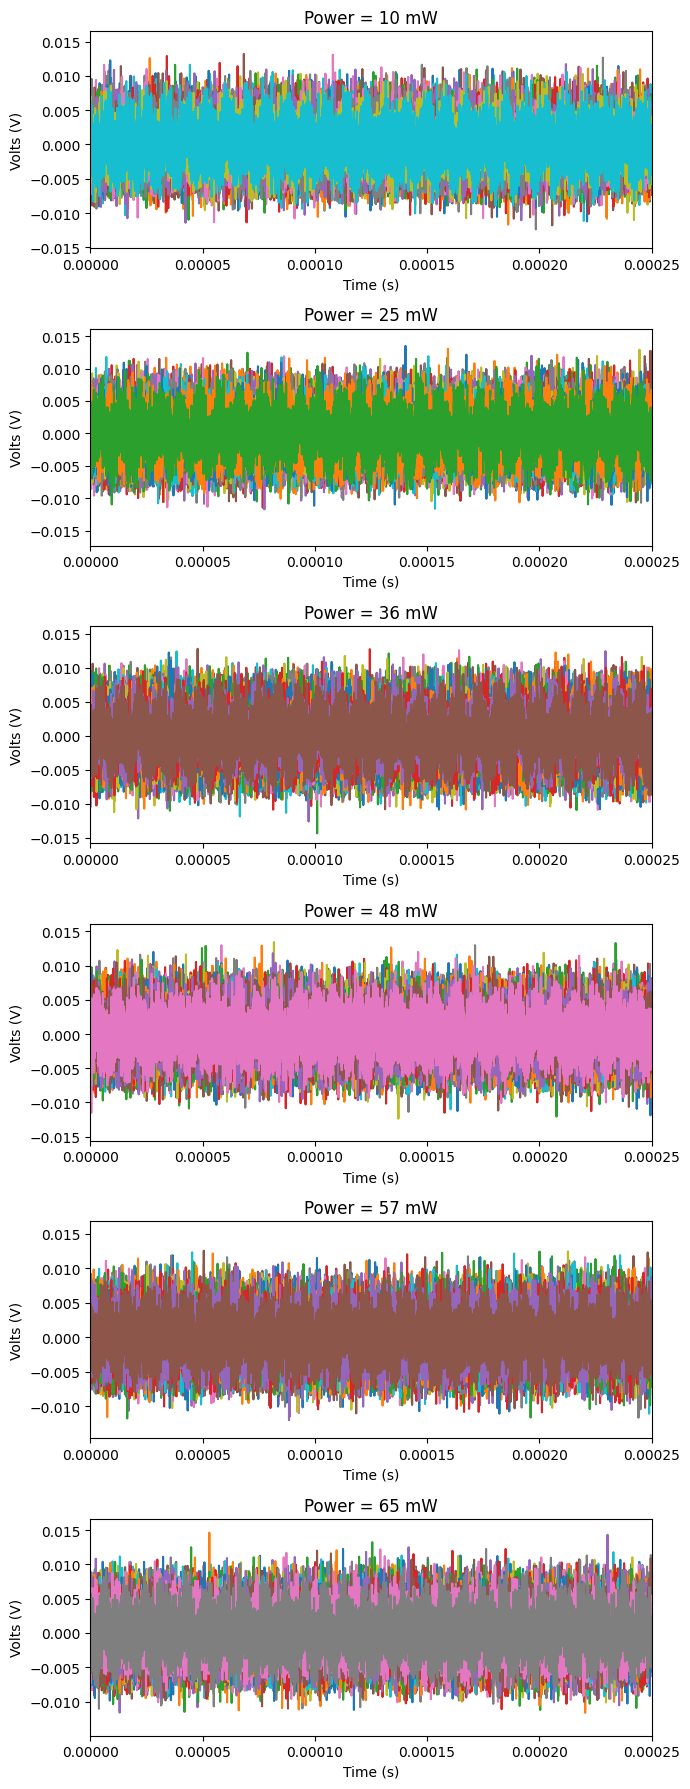

In [7]:
fig, ax = plt.subplots(6, 1, figsize = (7, 18))
for i, d in enumerate(mic.get_data()):
    d.apply("detrend", mode = "linear", inplace = True)
    if int(mic.get_df()[i][24:26]) == Pins[0]:
        ax[0].plot(d.collection[0].t, d.collection[0].x)
    elif int(mic.get_df()[i][24:26]) == Pins[1]:
        ax[1].plot(d.collection[0].t, d.collection[0].x)
    elif int(mic.get_df()[i][24:26]) == Pins[2]:
        ax[2].plot(d.collection[0].t, d.collection[0].x)
    elif int(mic.get_df()[i][24:26]) == Pins[3]:
        ax[3].plot(d.collection[0].t, d.collection[0].x)
    elif int(mic.get_df()[i][24:26]) == Pins[4]:
        ax[4].plot(d.collection[0].t, d.collection[0].x)
    elif int(mic.get_df()[i][24:26]) == Pins[5]:
        ax[5].plot(d.collection[0].t, d.collection[0].x)
for i, a in enumerate(ax):
    a.set_xlim(0, 2.5e-4)
    a.set_xlabel("Time (s)")
    a.set_ylabel("Volts (V)")
    a.set_title("Power = " + str(Pins[i]) + " mW")
plt.tight_layout()
plt.show()

In [8]:
m_freqs = []
m_psds = []
for i, d in enumerate(mic.get_data()):
    d.apply("detrend", mode = "linear", inplace = True)
    f, x = welch(d.collection[0].x, 250000000, nperseg = 10000, nfft = 100000)
    m_freqs.append(np.array(f))
    m_psds.append(np.array(x))
    mic.set_data(ind = i)

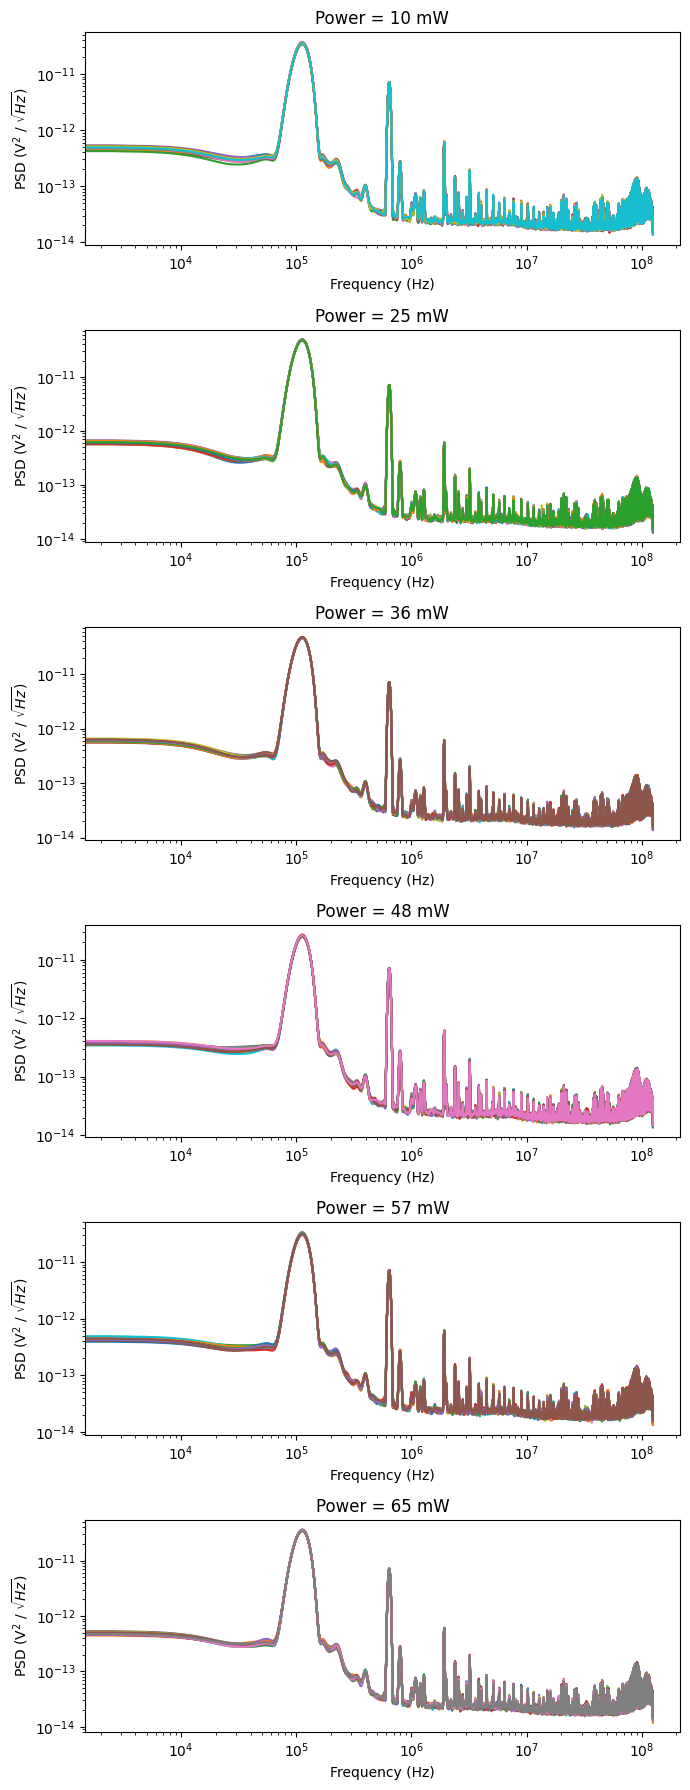

In [9]:
fig, ax = plt.subplots(6, 1, figsize = (7, 18))
for i, d in enumerate(mic.get_data()):
    if int(mic.get_df()[i][24:26]) == Pins[0]:
        ax[0].plot(m_freqs[i], m_psds[i])
    elif int(mic.get_df()[i][24:26]) == Pins[1]:
        ax[1].plot(m_freqs[i], m_psds[i])
    elif int(mic.get_df()[i][24:26]) == Pins[2]:
        ax[2].plot(m_freqs[i], m_psds[i])
    elif int(mic.get_df()[i][24:26]) == Pins[3]:
        ax[3].plot(m_freqs[i], m_psds[i])
    elif int(mic.get_df()[i][24:26]) == Pins[4]:
        ax[4].plot(m_freqs[i], m_psds[i])
    elif int(mic.get_df()[i][24:26]) == Pins[5]:
        ax[5].plot(m_freqs[i], m_psds[i])
for i, a in enumerate(ax):
    a.set_xlabel("Frequency (Hz)")
    a.set_ylabel(r"PSD (V$^2$ / $\sqrt{Hz}$)")
    a.set_title("Power = " + str(Pins[i]) + " mW")
    a.set_xscale("log")
    a.set_yscale("log")
plt.tight_layout()
plt.show()